In [20]:
import numpy as np
import spectral_embedding as se
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import karateclub
import networkx as nx
sys.path.insert(1, os.path.realpath(os.path.pardir))

In [9]:
K = 4
T = 2
n = 1000
pi = np.repeat(1/K, K)

Bs = np.array([[[0.08, 0.02, 0.18, 0.10],
                [0.02, 0.20, 0.04, 0.10],
                [0.18, 0.04, 0.02, 0.02],
                [0.10, 0.10, 0.02, 0.06]],
               [[0.16, 0.16, 0.04, 0.10],
                [0.16, 0.16, 0.04, 0.10],
                [0.04, 0.04, 0.09, 0.02],
                [0.10, 0.10, 0.02, 0.06]]])

In [10]:
for i in range(4):
    print("community ",i,":",np.linalg.norm(Bs[0][i]-Bs[1][i]))

community  0 : 0.21354156504062624
community  1 : 0.14560219778561037
community  2 : 0.15652475842498526
community  3 : 0.0


In [11]:
As, Z = se.generate_SBM_dynamic(n, Bs, pi)

In [12]:
colours = np.array(list(mpl.colors.TABLEAU_COLORS.keys())[0:K])
Zcol = colours[Z]

In [13]:
_, YAs_UASE = se.UASE(As, K)
Ys_UASE, SigmaYs_UASE = se.SBM_dynamic_distbn(As, Bs, Z, pi, K)

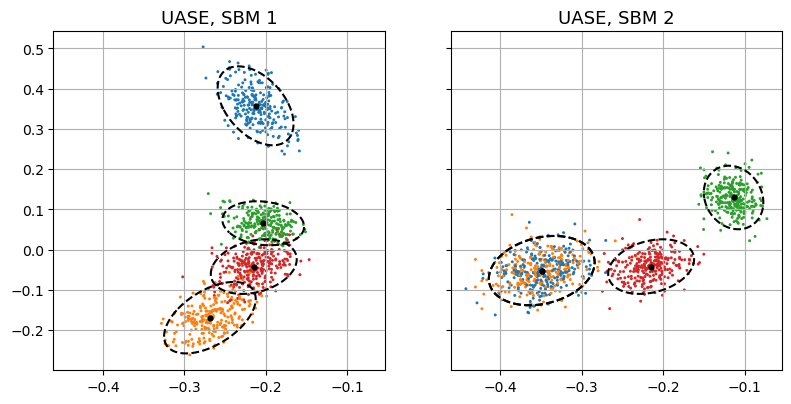

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(9.4,4.4), sharex=True, sharey=True)

for t in range(T):
    axs[t].grid()
    axs[t].scatter(YAs_UASE[t,:,0], YAs_UASE[t,:,1], marker='.', s=5, c=Zcol)
    axs[t].scatter(Ys_UASE[t,:,0], Ys_UASE[t,:,1], marker='o', s=12, c='black')
    
    for i in range(K):
        ellipse = se.gaussian_ellipse(Ys_UASE[t,i], SigmaYs_UASE[t,i][0:2,0:2]/n)
        axs[t].plot(ellipse[0], ellipse[1],'--', color='black')
        
    axs[t].set_title('UASE, SBM ' + str(t+1), fontsize=13);

In [16]:
import pandas as pd
node_dict = dict(zip(np.arange(1000), np.arange(1000)))
#pd.Series(node_dict,name="name").to_csv("node_dict.tsv")

In [19]:
from node2vec2rank.utils import compute_pairwise_distances
compute_pairwise_distances(YAs_UASE[0], YAs_UASE[1], node_dict)

,node,dist
0,0,0.106891
1,1,0.374632
2,2,0.595607
3,3,0.827944
4,4,0.405597
...,...,...
995,995,0.595981
996,996,0.535626
997,997,0.507116
998,998,0.072206


In [21]:
import csrgraph as cg

networks_csr = [cg.csrgraph(x) for x in As]
networksx= [nx.from_numpy_matrix(x) for x in As]
#edges_lists=[np.argwhere(x == 1) for x in As]
#for i,edge_list in enumerate(edges_lists):
#    np.savetxt(f'edge_list{i}.tsv', edge_list, delimiter='\t', fmt='%d')

In [51]:
"""from grape import Graph
graph1=Graph.from_csv(
# Edges related parameters

    ## The path to the edges list tsv
    edge_path='edge_list0.tsv',
    ## Set the tab as the separator between values
    edge_list_separator="\t",
    ## The first rows should NOT be used as the columns names
    edge_list_header=False,
    ## The source nodes are in the first nodes
    sources_column_number=0,
    ## The destination nodes are in the second column
    destinations_column_number=1,
    ## Both source and destinations columns use numeric node_ids instead of node names
    edge_list_numeric_node_ids=True,

    # Nodes related parameters
    ## The path to the nodes list tsv
    node_path="node_dict.tsv",
    ## Set the tab as the separator between values
    node_list_separator=",",
    ## The first rows should be used as the columns names
    node_list_header=True,
    ## The column with the node names is the one with name "node_name".
    nodes_column="name",

    # Graph related parameters
    ## The graph is undirected
    directed=False,
    ## The name of the graph is HomoSapiens
    name="sample_0",
    ## Display a progress bar, (this might be in the terminal and not in the notebook)
    verbose=True,
)
from grape import Graph
graph2=Graph.from_csv(
# Edges related parameters

    ## The path to the edges list tsv
    edge_path='edge_list1.tsv',
    ## Set the tab as the separator between values
    edge_list_separator="\t",
    ## The first rows should NOT be used as the columns names
    edge_list_header=False,
    ## The source nodes are in the first nodes
    sources_column_number=0,
    ## The destination nodes are in the second column
    destinations_column_number=1,
    ## Both source and destinations columns use numeric node_ids instead of node names
    edge_list_numeric_node_ids=True,

    # Nodes related parameters
    ## The path to the nodes list tsv
    node_path="node_dict.tsv",
    ## Set the tab as the separator between values
    node_list_separator=",",
    ## The first rows should be used as the columns names
    node_list_header=True,
    ## The column with the node names is the one with name "node_name".
    nodes_column="name",

    # Graph related parameters
    ## The graph is undirected
    directed=False,
    ## The name of the graph is HomoSapiens
    name="sample_0",
    ## Display a progress bar, (this might be in the terminal and not in the notebook)
    verbose=True,
)
from grape.embedders import WalkletsSkipGramEnsmallen
embedder=WalkletsSkipGramEnsmallen(embedding_size=32)
embedding = embedder.fit_transform(graph1,return_dataframe=False)
#embedding_2 = embedder.fit_transform(graph2)
embedding_arr=embedding.get_all_node_embedding()
embedding_arr2=embedding_2.get_all_node_embedding()
"""

In [22]:
from karateclub import Walklets
embedder=Walklets(dimensions= 32)
embedder.fit(networksx[0])
first=embedder.get_embedding()
embedder.fit(networksx[1])
second=embedder.get_embedding()

concat = np.concatenate((first, second), axis=0)
first_labels = np.zeros((first.shape[0],1))
second_labels = np.ones((second.shape[0],1))
both_labels = np.append(first_labels, second_labels,axis=0)

In [28]:
from node2vec2rank.model import Model2Rank,MultiModel2Rank
import json
config = json.load(open(r'F:\Python & Data Science & ML\Fatima Fellowship\node2vec2rank\config.json','r'))
config={param:value for section,params in config.items() for param,value in params.items() }
os.makedirs(config["save_dir"],exist_ok=True)

# check if there are multiple values for any given parameter
multi_params=[key for key in config.keys() if isinstance(config[key], list) and len(config[key])>1]
if not multi_params:
    print("Model2Rank")
    Model2Rank(graphs=networks_csr,config=config,node_dict=node_dict).walk_fit_rank()
else:
    print('MultiModel2Rank')
    MultiModel2Rank(graphs=networks_csr,config=config,node_dict=node_dict).walk_fit_rank()



MultiModel2Rank
Iteration 1:
Generating 30 random walks per gene and graph of length 15 
Training word2vec model...
Iteration 1:
Generating 30 random walks per gene and graph of length 20 
Training word2vec model...


In [25]:
from sklearn import preprocessing

## need to have integers to plot the color label 
le = preprocessing.LabelEncoder()
assignments = le.fit_transform(Zcol)

In [27]:
from node2vec2rank.embeddings import embed
from node2vec2rank.visualizer import Visualizer

vis=Visualizer()
pcs_first = embed(first, 'pca', 2)

vis.plot_embeddings(pcs_first, color = assignments)

pcs_second = embed(second, 'pca', 2)

vis.plot_embeddings(pcs_second, color = assignments)

The manifold embedding has shape: (1000, 2)


In [28]:
from node2vec2rank.utils import compute_pairwise_distances
compute_pairwise_distances(first,second, node_dict)

,node,dist
0,0,0.689940
1,1,0.798078
2,2,0.680674
3,3,0.542495
4,4,0.787534
...,...,...
995,995,0.709163
996,996,0.880800
997,997,0.895996
998,998,1.105818


In [29]:
from karateclub import Role2Vec
embedder=Role2Vec(dimensions= 32)
embedder.fit(networksx[0])
first=embedder.get_embedding()
embedder.fit(networksx[1])
second=embedder.get_embedding()

concat = np.concatenate((first, second), axis=0)
first_labels = np.zeros((first.shape[0],1))
second_labels = np.ones((second.shape[0],1))
both_labels = np.append(first_labels, second_labels,axis=0)

In [30]:
from node2vec2rank.embeddings import embed
from node2vec2rank.visualizer import Visualizer

vis=Visualizer()
pcs_first = embed(first, 'pca', 2)

vis.plot_embeddings(pcs_first, color = assignments)

pcs_second = embed(second, 'pca', 2)

vis.plot_embeddings(pcs_second, color = assignments)

The manifold embedding has shape: (1000, 2)


The manifold embedding has shape: (1000, 2)


In [34]:
!curl https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

In [31]:
from gensim.models import KeyedVectors

# Load the pre-trained GloVe embeddings
glove_vectors = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'